## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Import DataFrame with Pandas and view a piece of the DataFrame

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
kc_df = pd.read_csv('kc_house_data.csv')

In [2]:
kc_df.head()
# Take a peek at the data and see if anything does not look right off the start. I can already see a NaN value for waterfront and year renovated aswell.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
kc_df.info()
# 21 columns, 21597 data entries
#exploring column names and index range to see if there are missing values in the dataset. Also noting the type of data: integer, float, or object. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
# My code above returned that I have missing values in "waterfront", "view", and "year renovated"
# Now I want to double check this using "isna()" 

kc_df.isna().sum()

#The output looks like both methods pointed out the same number of missing values in the dataset.

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
# I will be calculating the age of the house to try and find the oldest homes in the dataset.
# I will create a new variable called "house_age"

kc_df['house_age'] = 2019 - kc_df['yr_built']

In [6]:
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,64
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,68
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,86
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,54
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,32


In [7]:
kc_df['house_age']

0         64
1         68
2         86
3         54
4         32
5         18
6         24
7         56
8         59
9         16
10        54
11        77
12        92
13        42
14       119
15        40
16        25
17       103
18        98
19        50
20        72
21        51
22        24
23        34
24        34
25        78
26       104
27       110
28        71
29        14
        ... 
21567     76
21568     12
21569     10
21570     10
21571     13
21572     12
21573      9
21574     12
21575      5
21576     11
21577     13
21578     11
21579     13
21580      5
21581     12
21582      5
21583     16
21584     11
21585     11
21586      5
21587     16
21588      5
21589      5
21590     10
21591     11
21592     10
21593      5
21594     10
21595     15
21596     11
Name: house_age, Length: 21597, dtype: int64

In [8]:
kc_df['house_age'].head()

0    64
1    68
2    86
3    54
4    32
Name: house_age, dtype: int64

In [9]:
#Now I am going to copy the kc_df to look at the data - called "newkc_df"

newkc_df = kc_df.copy()
newkc_df.head()

#Reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,64
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,68
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,86
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,54
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,32


In [10]:
newkc_df.drop(columns = ['id', 'date', 'sqft_basement' ], inplace=True)
#removing objects ('date', 'sqft_basement') and 'id' column because this data is not neccessary for what I am looking at.

In [11]:
newkc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
house_age        21597 non-null int64
dtypes: float64(8), int64(11)
memory usage: 3.1 MB


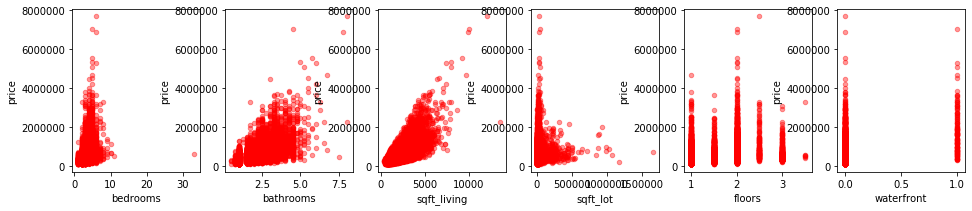

In [12]:
# I want to check to see what all of the column variables look like based on price.
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))
for xcol, ax in zip(list(newkc_df)[1:7], axes):
                    newkc_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha = 0.4, color = 'r');

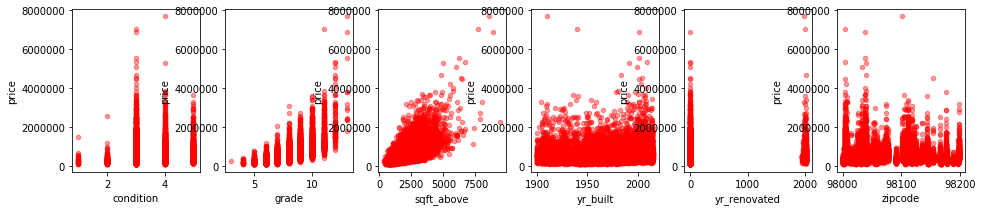

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))
for xcol, ax in zip(list(newkc_df)[8:14], axes):
                    newkc_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha = 0.4, color = 'r');

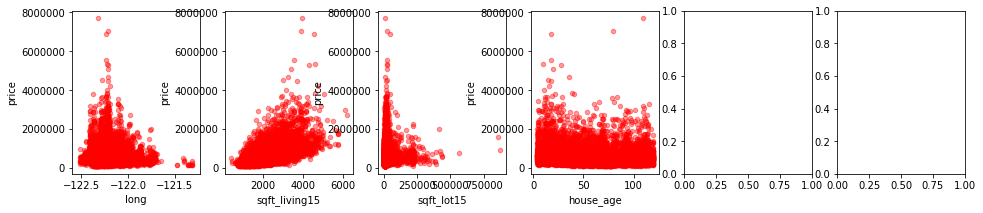

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))
for xcol, ax in zip(list(newkc_df)[15:20], axes):
                    newkc_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha = 0.4, color = 'r');

In [ ]:
# Before looking at my main variables: zipcodes, price, and house age,
# I am going to clean my data by dealing with the missing values
# I see outliers, which I am going to clean as well.

In [15]:
#I am going to look at the missing values again and then replace them
newkc_df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
house_age           0
dtype: int64

In [16]:
newkc_df['yr_renovated'] = newkc_df['yr_renovated'].fillna(0)
newkc_df['view'] = newkc_df['view'].fillna(0)
newkc_df['waterfront'] = newkc_df['waterfront'].fillna(0)

newkc_df.isna().sum()

#https://datatofish.com/replace-nan-values-with-zeros/

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
house_age        0
dtype: int64

In [17]:
newkc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
house_age        21597 non-null int64
dtypes: float64(8), int64(11)
memory usage: 3.1 MB


In [ ]:
# Now that I dealt with missing values, I can use IQG to remove outliers from the dataframe.

In [18]:
Q1 = newkc_df.quantile(0.25)
Q3 = newkc_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

price            323000.0000
bedrooms              1.0000
bathrooms             0.7500
sqft_living        1120.0000
sqft_lot           5645.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             1.0000
grade                 1.0000
sqft_above         1020.0000
yr_built             46.0000
yr_renovated          0.0000
zipcode              85.0000
lat                   0.2069
long                  0.2030
sqft_living15       870.0000
sqft_lot15         4983.0000
house_age            46.0000
dtype: float64


In [19]:
print(newkc_df < (Q1 - 1.5 * IQR)) |(newkc_df > (Q3 + 1.5 * IQR))

#We get an error because I did not clean the data types of a lot of the code,
#but it's ok to mess up the columns I am not using for now,
#since I am only looking at a few.

       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0      False     False      False        False     False   False       False   
1      False     False      False        False     False   False       False   
2      False     False      False        False     False   False       False   
3      False     False      False        False     False   False       False   
4      False     False      False        False     False   False       False   
5      False     False      False        False     False   False       False   
6      False     False      False        False     False   False       False   
7      False     False      False        False     False   False       False   
8      False     False      False        False     False   False       False   
9      False     False      False        False     False   False       False   
10     False     False      False        False     False   False       False   
11     False     False      False       

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [20]:
newkc_df_out = newkc_df[~((newkc_df < (Q1 - 1.5 * IQR)) |(newkc_df > (Q3 + 1.5 * IQR))).any(axis=1)]
newkc_df_out.shape

# Now the outliers are removed from the Dataset "newkc_df"

(15094, 19)

In [ ]:
#Here we are trying to get the average house price for every house age (1, 2, 3, 4 (years old), etc.) 

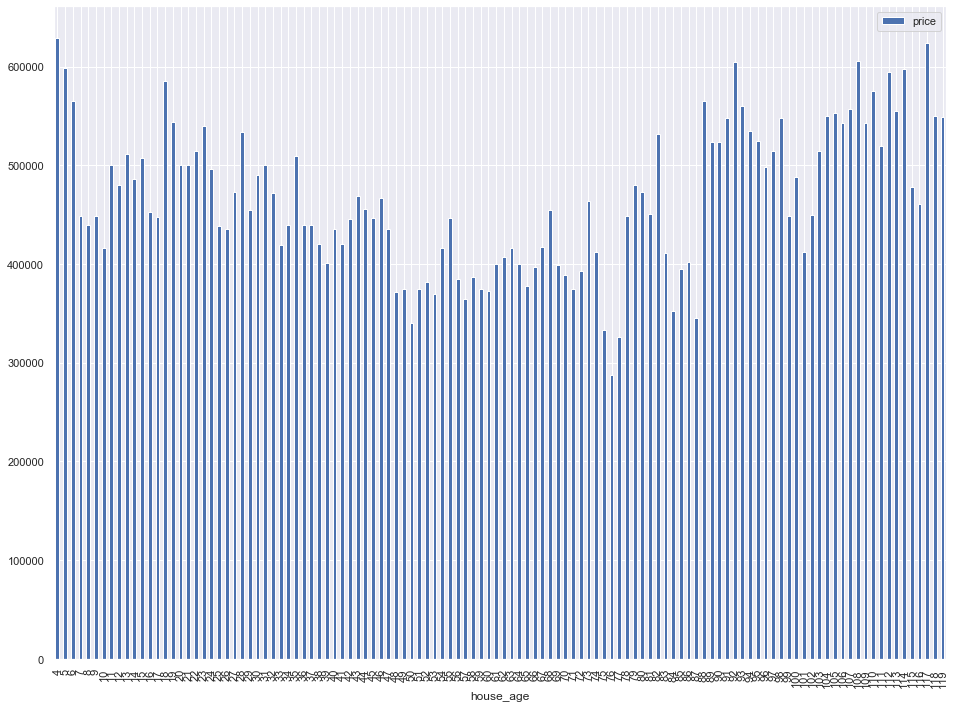

In [21]:
sns.set(rc={'figure.figsize': (16,12)})
new_df = kc_df[['house_age', 'price']].copy().rename(columns = {'median': 'median price $'})
new_df.groupby("house_age").median().plot(y='price', kind = 'bar')

#Now I wan't to visualize the data and graph it with a bar graph. 

#new_df.head()
#new_df.groupby("house_age").median().plot(y='price', kind = 'bar')
#new_df.groupby('house_age')['price'].describe().rename(columns = {'count': '# of Houses',
                        #'mean': 'Mean', 'std': 'Variation', 'min': 'Min', 
                        #'25%': '1st Qtl','50%': 'Median', '75%': '3rd Qtl',
                        #'max': 'Max', 'price': 'Price $'})

In [ ]:
#Great, we can see that houses 76 years old have the lowest average price of around 290k.
#This is the only average price based on house age under 300k.

In [22]:
newkc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
house_age        21597 non-null int64
dtypes: float64(8), int64(11)
memory usage: 3.1 MB


In [23]:
# Now I want to visually look at how Price effects zipcode, and how house age effects zip code.
# First I want to get an idea of my zipcode data.

newkc_df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [24]:
newkc_df['zipcode'].describe()

count    21597.000000
mean     98077.951845
std         53.513072
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

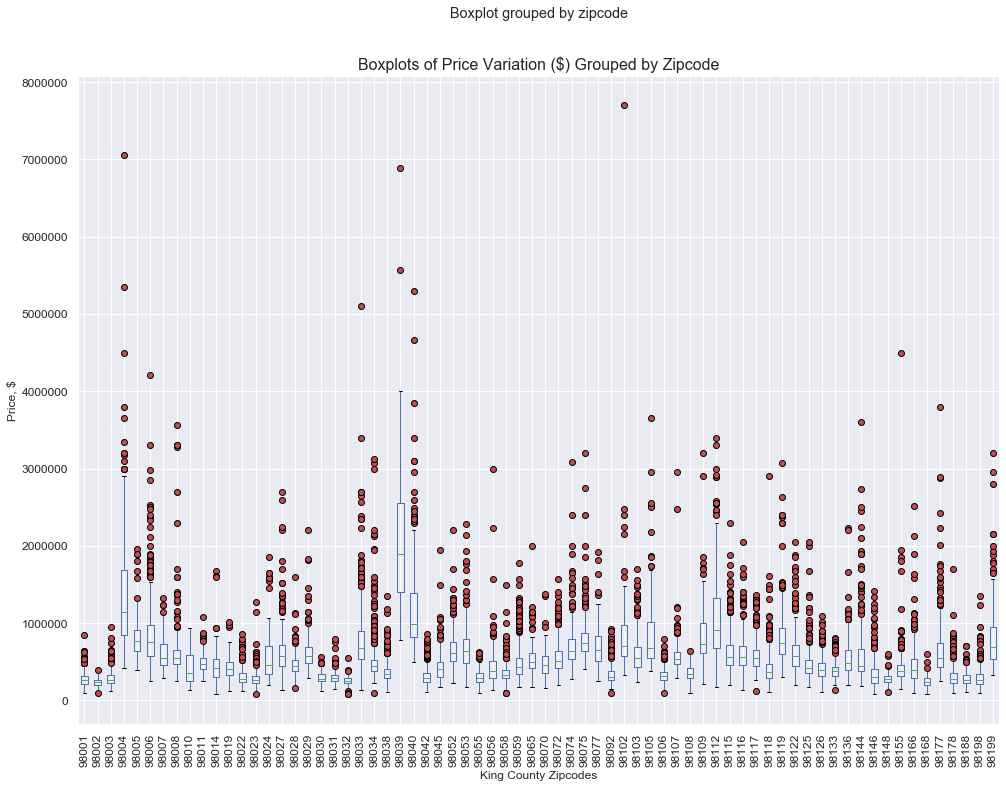

In [25]:
#Looking at how price effects zipcode

red = dict(markerfacecolor='r')
sns.set(rc={'figure.figsize': (16,12)})
newkc_df.boxplot(by='zipcode', column='price', fontsize = 12, rot = 90, flierprops = red);

plt.title('Boxplots of Price Variation ($) Grouped by Zipcode', fontsize = 16)

plt.xlabel('King County Zipcodes', fontsize = 12);
plt.ylabel('Price, $', fontsize = 12);
plt.savefig("Price vs Zip.png")


# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

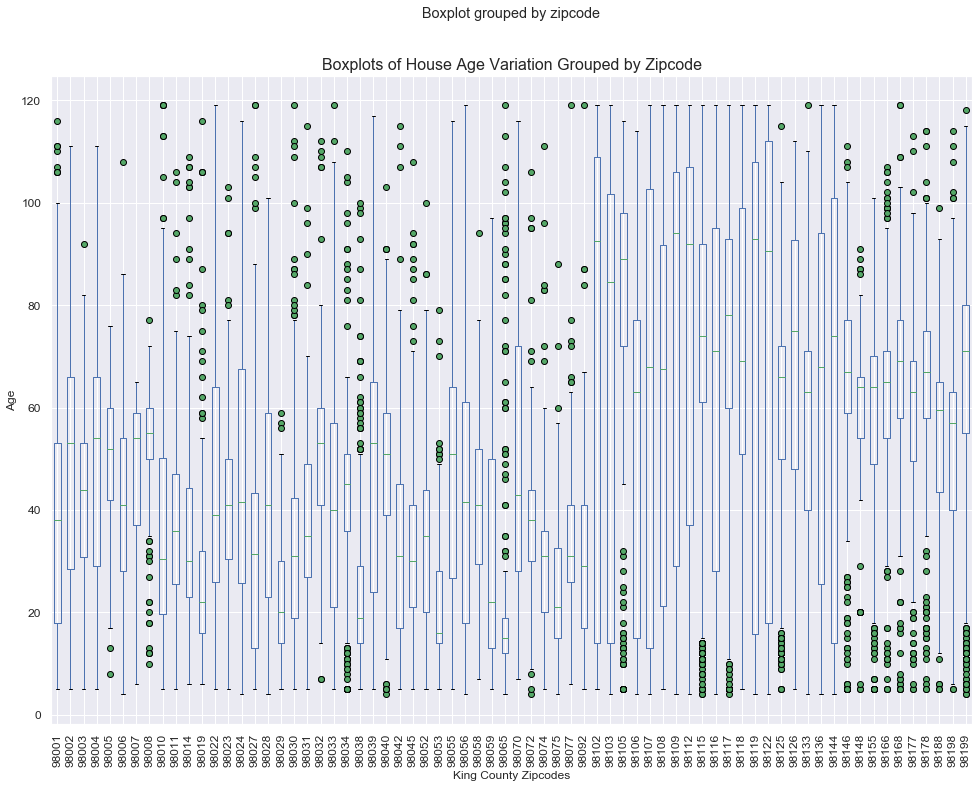

In [26]:
# Looking at how house_age effects zipcode.

green = dict(markerfacecolor='g')
sns.set(rc={'figure.figsize': (16,12)})
newkc_df.boxplot(by='zipcode', column='house_age', fontsize = 12, rot = 90, flierprops = green);

plt.title('Boxplots of House Age Variation Grouped by Zipcode', fontsize = 16)

plt.xlabel('King County Zipcodes', fontsize = 12);
plt.ylabel('Age', fontsize = 12);
plt.savefig("House Age vs Zip.png")


# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

In [ ]:
#98102 Zipcode average house age is between 90-95 years old. Yet, on average, the house prices range from 50k-100k.

In [27]:
newkc_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'house_age'],
      dtype='object')

In [ ]:
#1st - kc_df - added new variable to original df
#2nd - newkc_df - cleaned data from original df
#3rd - new_dfmake another df for data viz